In [1]:
%load_ext autoreload
%autoreload 2

from Eir import AgeStructuredSIR, AgeStructuredSIRD, AgeStructuredSIRVD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../style.mplstyle")

In [3]:
days, dt = 31, 0.1

## AgeStructuredSIR

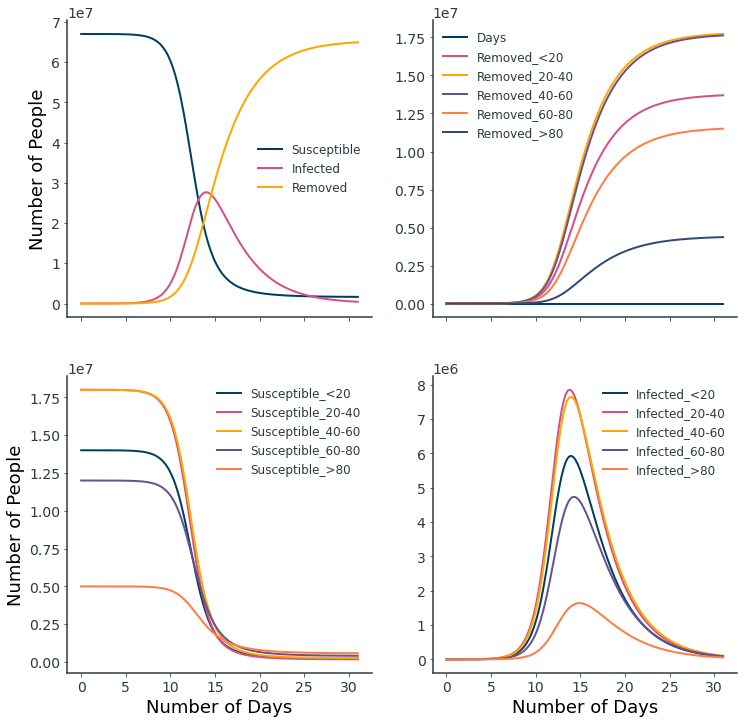

In [4]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [140, 180, 180, 120, 50]
R0 = [0, 0, 0, 0, 0]
beta = np.array(
    [
        [2.0, 1.5, 1.0, 0.7, 0.5],
        [1.5, 1.8, 1.4, 1.0, 0.6],
        [1.0, 1.4, 1.6, 1.2, 0.7],
        [0.7, 1.0, 1.2, 1.3, 0.8],
        [0.5, 0.6, 0.7, 0.8, 0.9],
    ]
)
gamma = [0.3] * 5  # gamma=0.15: infected recover after 6.8 days; 0.5: after two days.
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIR(labels, beta, gamma, S0, I0, R0)
df, fig = sim.run(days, dt)
fig

In [5]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count
Combined,67000670,1647208,65353462,64936379
<20,14000140,222005,13778135,13697559
20-40,18000180,175599,17824581,17732678
40-60,18000180,261117,17739063,17636485
60-80,12000120,409915,11590205,11501704
>80,5000050,578571,4421479,4367951


## AgeStructuredSIRD

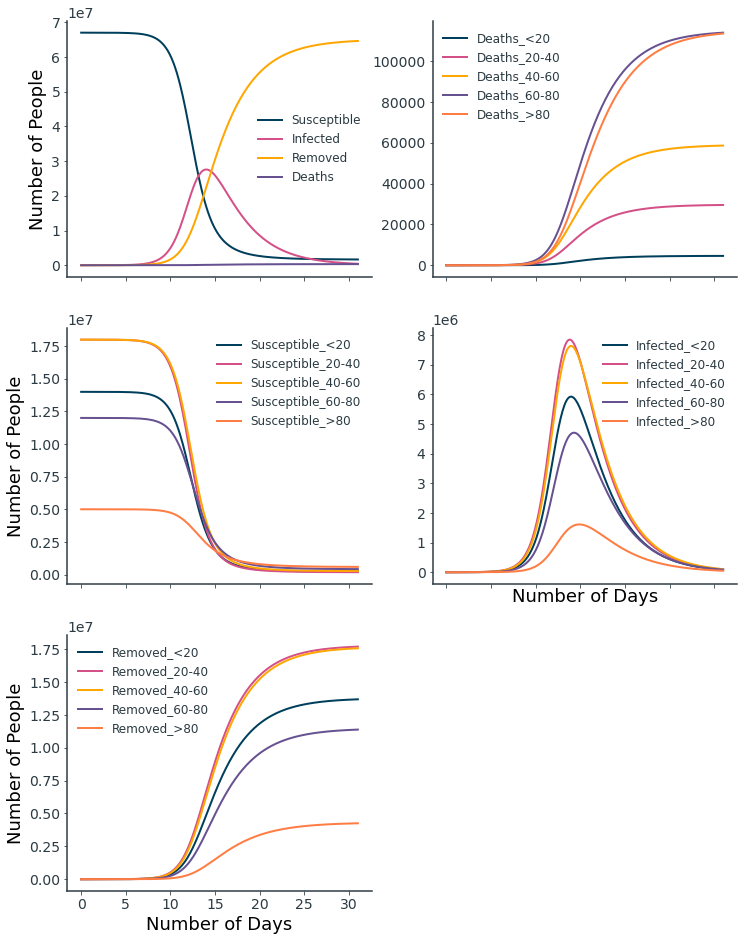

In [6]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [140, 180, 180, 120, 50]
R0 = [0, 0, 0, 0, 0]
beta = np.array(
    [
        [2.0, 1.5, 1.0, 0.7, 0.5],
        [1.5, 1.8, 1.4, 1.0, 0.6],
        [1.0, 1.4, 1.6, 1.2, 0.7],
        [0.7, 1.0, 1.2, 1.3, 0.8],
        [0.5, 0.6, 0.7, 0.8, 0.9],
    ]
)
gamma = [0.3] * 5  # gamma=0.15: infected recover after 6.8 days; 0.5: after two days.
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
df, fig = sim.run(days, dt)
fig

In [7]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Deaths_Count,Fatality_Rate%
Combined,67000670,1660470,65340200,64612606,319975,0.489706
<20,14000140,222853,13777287,13692077,4564,0.033127
20-40,18000180,176772,17823408,17702458,29504,0.165535
40-60,18000180,263491,17736689,17576761,58589,0.330327
60-80,12000120,414058,11586062,11386984,113869,0.982810
>80,5000050,583293,4416757,4254324,113448,2.568581


## AgeStructuredSIRVD

### Vaccines Available Early

#### Vaccinate Young First

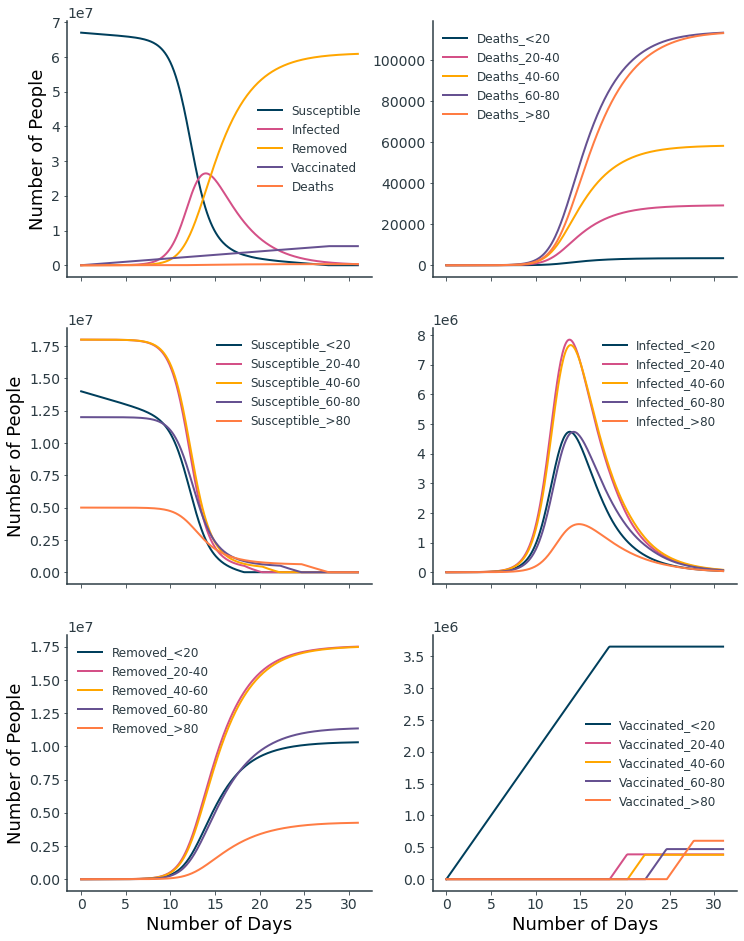

In [8]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [140, 180, 180, 120, 50]
R0 = [0, 0, 0, 0, 0]
V0, Vd = [0, 0, 0, 0, 0], 200_000
beta = np.array(
    [
        [2.0, 1.5, 1.0, 0.7, 0.5],
        [1.5, 1.8, 1.4, 1.0, 0.6],
        [1.0, 1.4, 1.6, 1.2, 0.7],
        [0.7, 1.0, 1.2, 1.3, 0.8],
        [0.5, 0.6, 0.7, 0.8, 0.9],
    ]
)
gamma = [0.3] * 5  # gamma=0.15: infected recover after 6.8 days; 0.5: after two days.
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt)
fig

In [9]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Vaccinated_Count,Deaths_Count,Fatality_Rate%
Combined,67000670,0,61503476,60893149,5497194,317647,0.516470
<20,14000140,0,10349765,10306908,3650375,3435,0.033189
20-40,18000180,0,17610690,17509324,389490,29182,0.165706
40-60,18000180,0,17617784,17479586,382396,58265,0.330717
60-80,12000120,0,11527927,11349881,472193,113498,0.984548
>80,5000050,0,4397312,4247449,602738,113265,2.575778


#### Vaccinate Old First

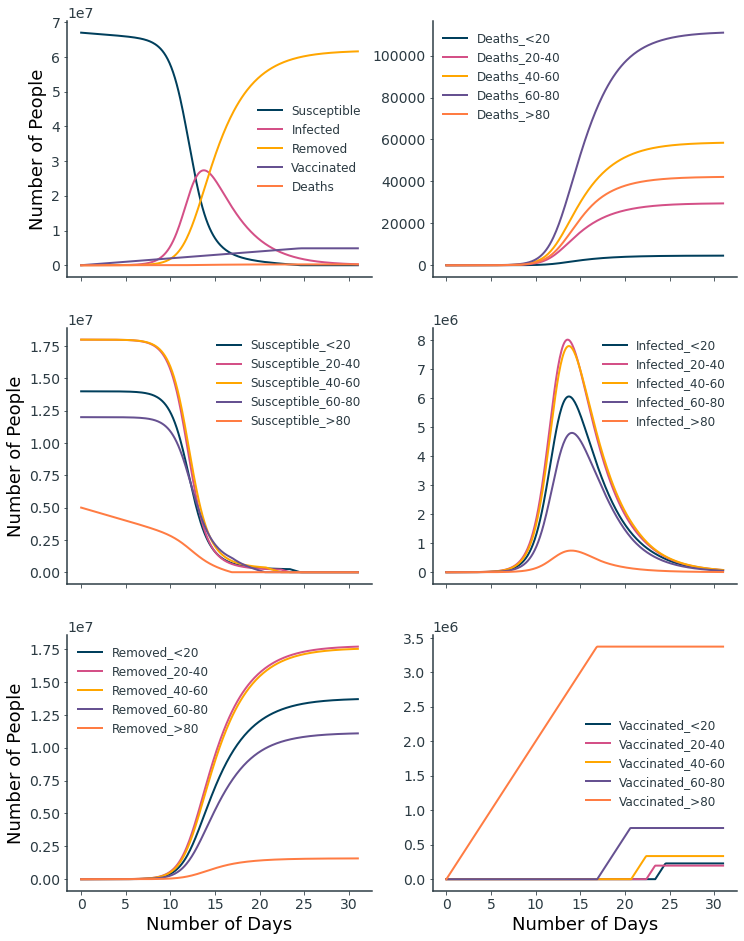

In [10]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [140, 180, 180, 120, 50]
R0 = [0, 0, 0, 0, 0]
V0, Vd = [0, 0, 0, 0, 0], 200_000
beta = np.array(
    [
        [2.0, 1.5, 1.0, 0.7, 0.5],
        [1.5, 1.8, 1.4, 1.0, 0.6],
        [1.0, 1.4, 1.6, 1.2, 0.7],
        [0.7, 1.0, 1.2, 1.3, 0.8],
        [0.5, 0.6, 0.7, 0.8, 0.9],
    ]
)
gamma = [0.3] * 5  # gamma=0.15: infected recover after 6.8 days; 0.5: after two days.
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt, reverse_vaccination=True)
fig

In [11]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Vaccinated_Count,Deaths_Count,Fatality_Rate%
Combined,67000670,0,62125811,61612353,4874859,245606,0.395336
<20,14000140,0,13771702,13703585,228438,4567,0.033162
20-40,18000180,0,17803610,17700784,196570,29501,0.165702
40-60,18000180,0,17665148,17530782,335032,58435,0.330793
60-80,12000120,0,11258117,11097434,742003,110974,0.985724
>80,5000050,0,1627236,1579767,3372814,42127,2.588868


### Vaccines Available Late

#### Vaccinate Young First

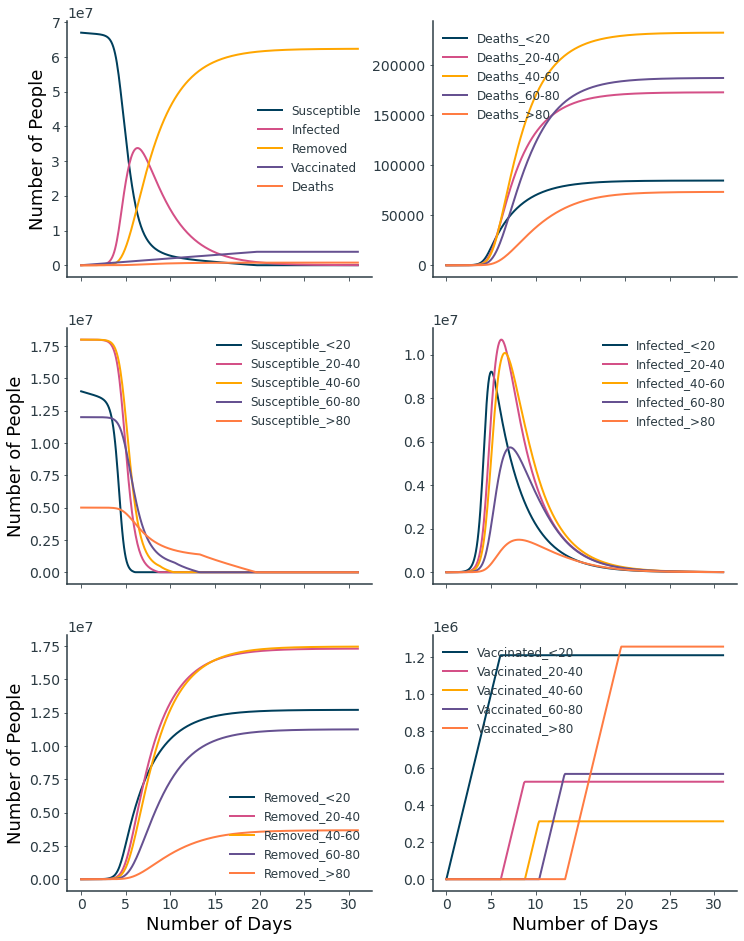

In [12]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [140, 180, 180, 120, 50]
R0 = [0, 0, 0, 0, 0]
V0, Vd, V_delay = [0, 0, 0, 0, 0], 200_000, 0
beta = np.array(
    [
        [15, 2.25, 1.0, 0.49, 0.25],
        [2.25, 3.24, 1.96, 1.0, 0.36],
        [1.0, 1.96, 2.56, 1.44, 0.49],
        [0.49, 1.0, 1.44, 1.69, 0.64],
        [0.25, 0.36, 0.49, 0.64, 0.81],
    ]
)
gamma = [0.3] * 5  # gamma=0.15: infected recover after 6.8 days; 0.5: after two days.
omega = [0.002, 0.003, 0.004, 0.005, 0.006]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt, delay_vaccination=V_delay)
fig

In [13]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Vaccinated_Count,Deaths_Count,Fatality_Rate%
Combined,67000670,0,63128385,62350441,3872285,750915,1.189505
<20,14000140,0,12790802,12702597,1209338,84683,0.662062
20-40,18000180,0,17473963,17294629,526217,172946,0.989735
40-60,18000180,0,17687739,17447771,312441,232636,1.315239
60-80,12000120,0,11431676,11238310,568444,187305,1.638474
>80,5000050,0,3744207,3667132,1255843,73342,1.958813


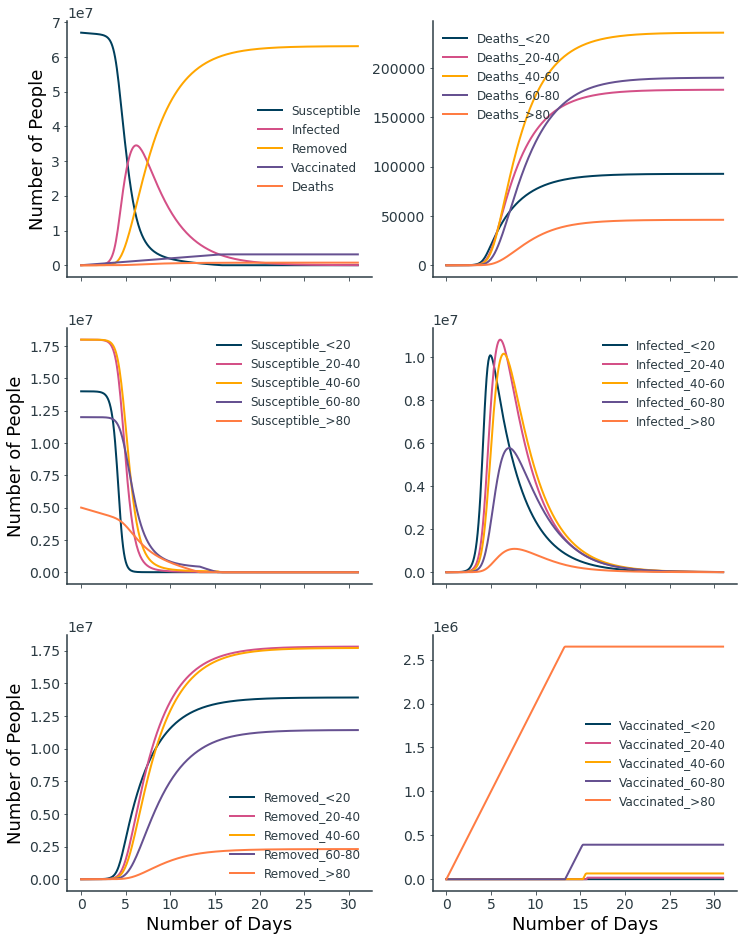

In [14]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [140, 180, 180, 120, 50]
R0 = [0, 0, 0, 0, 0]
V0, Vd, V_delay = [0, 0, 0, 0, 0], 200_000, 0
beta = np.array(
    [
        [15, 2.25, 1.0, 0.49, 0.25],
        [2.25, 3.24, 1.96, 1.0, 0.36],
        [1.0, 1.96, 2.56, 1.44, 0.49],
        [0.49, 1.0, 1.44, 1.69, 0.64],
        [0.25, 0.36, 0.49, 0.64, 0.81],
    ]
)
gamma = [0.3] * 5  # gamma=0.15: infected recover after 6.8 days; 0.5: after two days.
omega = [0.002, 0.003, 0.004, 0.005, 0.006]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt, reverse_vaccination=True, delay_vaccination=V_delay)
fig

In [15]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Vaccinated_Count,Deaths_Count,Fatality_Rate%
Combined,67000670,0,63876281,63107593,3124389,742808,1.162885
<20,14000140,0,14000135,13903659,5,92691,0.662072
20-40,18000180,0,17982850,17798180,17330,177981,0.989726
40-60,18000180,0,17934905,17691411,65275,235885,1.315229
60-80,12000120,0,11607502,11410912,392618,190181,1.638432
>80,5000050,0,2350891,2303428,2649159,46068,1.959597


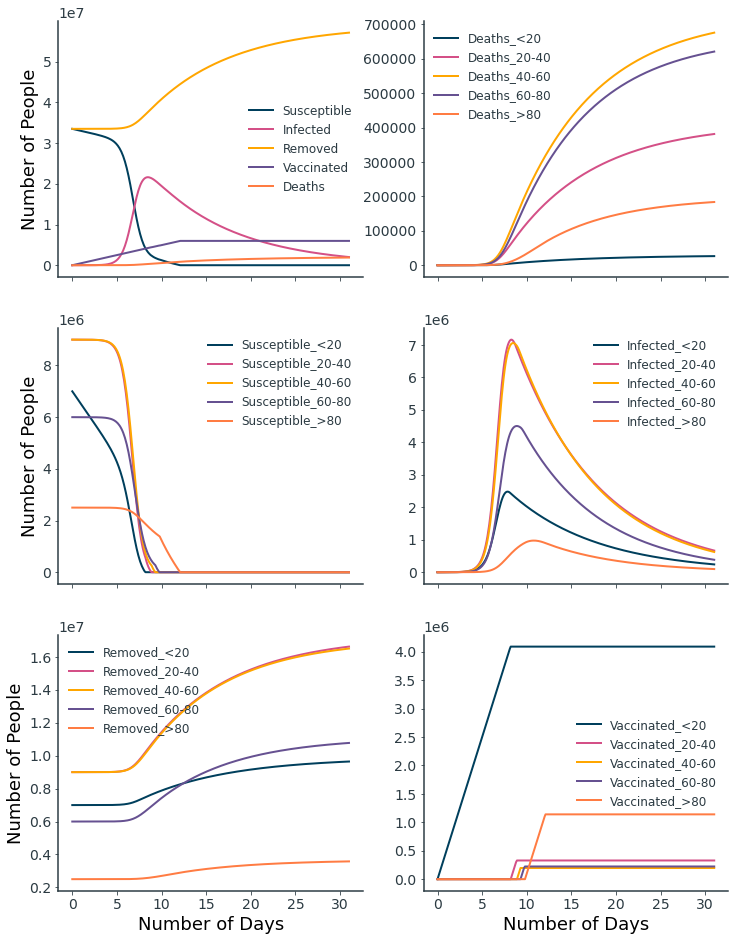

In [16]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [7000000, 9000000, 9000000, 6000000, 2500000]
I0 = [70, 90, 90, 60, 25]
R0 = [7000000, 9000000, 9000000, 6000000, 2500000]
V0, Vd = [0, 0, 0, 0, 0], 500_000
beta = np.array(
    [
        [8.0, 5.0, 3.2, 2.0, 0.2],
        [5.0, 6.0, 4.4, 2.8, 0.4],
        [3.2, 4.4, 5.0, 3.6, 0.6],
        [2.0, 2.8, 3.6, 4.0, 0.8],
        [0.2, 0.4, 0.6, 0.8, 1.0],
    ]
)
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.001, 0.005, 0.009, 0.013, 0.017]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt)
fig

In [17]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Vaccinated_Count,Deaths_Count,Fatality_Rate%
Combined,67000335,0,61023862,57127898,5976473,1887311,3.092743
<20,14000070,0,9911131,9644935,4088939,26449,0.266862
20-40,18000090,0,17671368,16623856,328722,381192,2.157117
40-60,18000090,0,17803954,16505492,196136,675494,3.794067
60-80,12000060,0,11776936,10773496,223124,620554,5.269231
>80,5000025,0,3860474,3580118,1139551,183620,4.756411


#### Vaccinate Old First

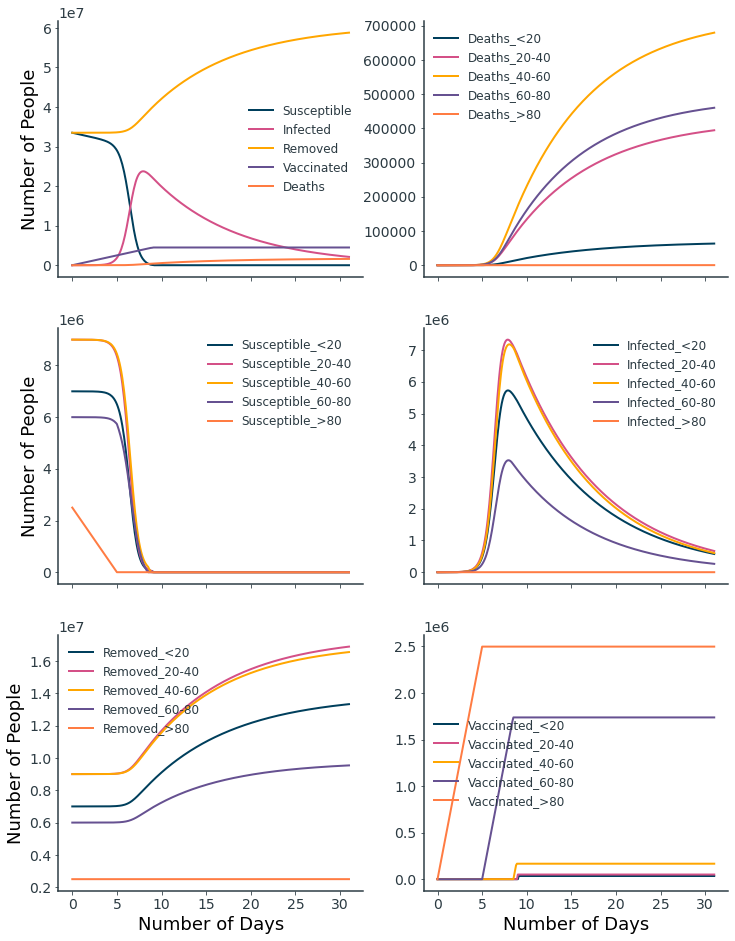

In [18]:
sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(days, dt, reverse_vaccination=True)
fig

In [19]:
sim.end_state()

,Start_Count,End_Susceptible,Infected_Count,Removed_Count,Vaccinated_Count,Deaths_Count,Fatality_Rate%
Combined,67000335,0,62514390,58807602,4485945,1597597,2.555567
<20,14000070,0,13965895,13328233,34175,63282,0.453118
20-40,18000090,0,17950222,16887938,49868,394396,2.197165
40-60,18000090,0,17833931,16550708,166159,679563,3.810506
60-80,12000060,0,10262490,9539204,1737570,460096,4.483278
>80,5000025,0,2501854,2501519,2498171,258,0.010312


Mean recovery: 6.7 days


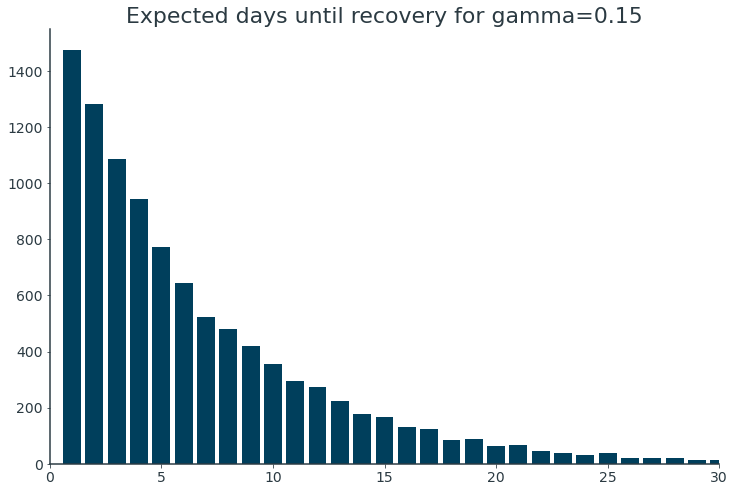

In [20]:
# expected days before recovery
g = 0.15
n_days = []
for _ in range(10_000):
    n = 1
    while True:
        if np.random.random() <= g:
            n_days.append(n)
            break
        else:
            n += 1
counts = pd.Series(n_days).value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlim(0, 30)
plt.title(f"Expected days until recovery for gamma={g}");
print(f"Mean recovery: {np.mean(n_days):.2} days")